In [2]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('datasets/student_scores.txt')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
X = data[['Hours']]
y = data[' Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  18.1151041578311
Mean absolute error:  3.9657593887812084
R2 Score:  0.974047128713709


In [38]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  21.659880609358535
Mean absolute error:  3.2153007744256996
R2 Score:  0.9689686524221225


In [37]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  18.114285403343008
Mean absolute error:  3.9639415559488023
R2 Score:  0.9740483017144083


### Regression answers

- Linear Regression: 0.9678055545167994
- Ridge: alpha=10: 0.9558771204343948
- Lasso: alpha=0.01: 0.9677897748848022

In [41]:
scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  18.115104157831148
Mean absolute error:  3.9657593887812177
R2 Score:  0.9740471287137089


### Data analysis

- test_size 0.1 da eng random_state 42 eng yaxshi ko'rsatkichga ega bo'ldi
- Model hech qanday overfit bo'lmayabdi, chunki MinMaxscaler va StandartScaler berilganda yaxshi natija ko'rsatmadi
- Eng yaxshi LR model bu Linearregression, chunki Ridge va Lassoda nisbatan pastroq natija chiqdi

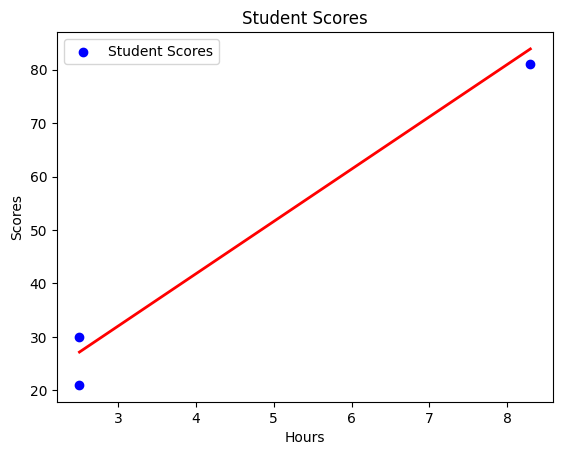

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Student Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.title('Student Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()